In [5]:
import pandas as pd

# Load the MNIST dataset
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Check the first few rows of the dataset
df.head()

# Check data summary
df.info()

# Check the distribution of labels in the first column (assuming it contains the labels)
df.iloc[:, 0].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


,count
6,
1,2243
7,2126
6,2038
9,2023
3,2021
2,1989
0,1962
4,1924
8,1912


In [7]:
# Separate features and labels
X = df.drop(df.columns[0], axis=1)  # Features (pixels) - Drop the first column using its index.
y = df[df.columns[0]]               # Labels (digit classes) - Select the first column using its index.

# Normalize the pixel values (0-255) to (0-1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15999, 784), (4000, 784), (15999,), (4000,))

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")


Logistic Regression Accuracy: 90.48%


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 95.43%


In [10]:
from sklearn.neural_network import MLPClassifier

# Train a simple Neural Network (Multi-layer Perceptron)
model_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300)
model_mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = model_mlp.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Accuracy: {accuracy_mlp * 100:.2f}%")

Neural Network Accuracy: 96.17%


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       377
           1       0.97      0.98      0.98       436
           2       0.96      0.96      0.96       390
           3       0.96      0.95      0.96       406
           4       0.95      0.97      0.96       401
           5       0.94      0.96      0.95       341
           6       0.99      0.98      0.98       412
           7       0.95      0.96      0.95       438
           8       0.96      0.95      0.95       384
           9       0.96      0.93      0.95       415

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



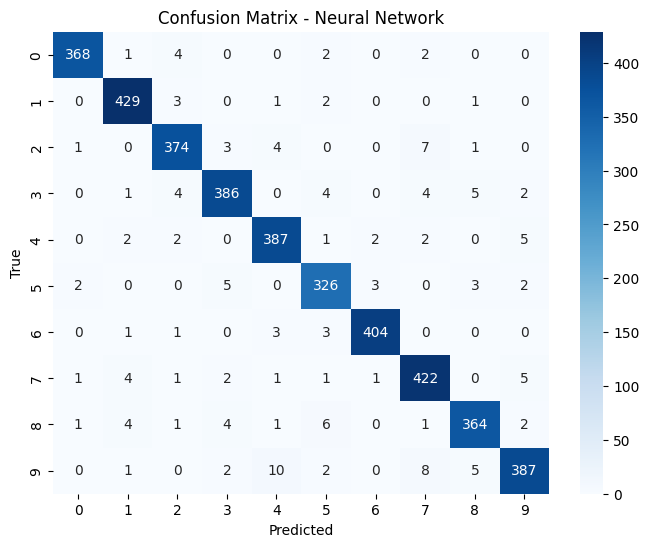

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for Neural Network
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(classification_report(y_test, y_pred_mlp))

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
import joblib

# Save the model to a file
joblib.dump(model_mlp, 'mnist_digit_classifier.pkl')

# To load the model later:
# loaded_model = joblib.load('mnist_digit_classifier.pkl')


['mnist_digit_classifier.pkl']